# 作业3：前馈神经网络+自动微分

## 1. 数值稳定的算法

在编写激活函数或计算损失函数时，经常会遇到一些极端的取值，如果不对其进行适当的处理，很可能导致计算结果出现 `NaN` 或其他异常结果，影响程序的正常运行。本题将着重练习若干数值稳定的计算方法。

### 第1题

(a) 考虑 Sigmoid 函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请利用 PyTorch 编写一个函数 `sigmoid(x)`，令其可以接收一个 Tensor `x`，返回 Sigmoid 函数在 `x` 上的取值。不可直接调用 `torch.sigmoid()`。

In [1]:
import numpy as np
import torch

def sigmoid(x):
    sig  = torch.exp(x) / ( 1 + torch.exp(x) )
    return sig

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


一个简单的测试：

In [2]:
x = torch.tensor([-1000.0, -100.0, -10.0, 0.0, 10.0, 100.0, 1000.0])

# PyTorch 自带函数
print(torch.sigmoid(x))

# 上面编写的函数
print(sigmoid(x))

tensor([0.0000e+00, 0.0000e+00, 4.5398e-05, 5.0000e-01, 9.9995e-01, 1.0000e+00,
        1.0000e+00])
tensor([0.0000e+00, 3.7835e-44, 4.5398e-05, 5.0000e-01, 9.9995e-01,        nan,
               nan])


(b) 如果出现异常取值，思考可能的原因是什么。（提示：Sigmoid 函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对 Sigmoid 函数的表达式进行某种等价变换？）请再次尝试编写 Sigmoid 函数。如果一切正常，可忽略此问题。

$\exp(x)$当$x$过大时发生溢出。可以上下同除以$\exp(x)$得到：
$$ \sigma(x) = \frac{1}{1+\exp(-x)}$$

In [3]:
import numpy as np
import torch

def sigmoid2(x):
    sig  = 1 / ( 1 + torch.exp(-x) )
    return sig

x = torch.tensor([-1000.0, -100.0, -10.0, 0.0, 10.0, 100.0, 1000.0])

# PyTorch 自带函数
print(torch.sigmoid(x))

# 上面编写的函数
print(sigmoid2(x))

tensor([0.0000e+00, 0.0000e+00, 4.5398e-05, 5.0000e-01, 9.9995e-01, 1.0000e+00,
        1.0000e+00])
tensor([0.0000e+00, 0.0000e+00, 4.5398e-05, 5.0000e-01, 9.9995e-01, 1.0000e+00,
        1.0000e+00])


### 第2题

(a) 考虑 Tanh 函数 $$\sigma(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$

请利用 PyTorch 编写一个函数 `tanh(x)`，令其可以接收一个 Tensor `x`，返回 Tanh 函数在 `x` 上的取值。不可直接调用 `torch.tanh()`。

In [4]:
import numpy as np
import torch

def tanh(x):
    ex = torch.exp(x)
    enx = torch.exp(-x)
    th = (ex - enx) / (ex + enx)
    return th

一个简单的测试：

In [5]:
x = torch.tensor([-1000.0, -100.0, -10.0, 0.0, 10.0, 100.0, 1000.0])

# PyTorch 自带函数
print(torch.tanh(x))

# 上面编写的函数
print(tanh(x))

tensor([-1., -1., -1.,  0.,  1.,  1.,  1.])
tensor([nan, nan, -1.,  0.,  1., nan, nan])


(b) 如果出现异常取值，思考可能的原因是什么。请再次尝试编写 Tanh 函数。如果一切正常，可忽略此问题。

当 $x>>0$时，分子$e^x$会发生溢出。可以上下同乘以$\exp(-x)$得到：
$$ \sigma(x) = \frac{1-\exp(-2x)}{1+\exp(-2x)}$$
当 $x<<0$时，分母$e^{-x}$会发生溢出。可以上下同乘以$\exp(x)$得到：
$$ \sigma(x) = \frac{\exp(2x)-1}{\exp(2x)+1}$$

In [6]:
x  = torch.tensor(2)
print(torch.where(x>3,2,0))

tensor(0)


In [7]:

import numpy as np
import torch

def tanh2(x):
    exp = torch.exp( -2 * torch.abs(x) ) # 此行代码灵感借鉴自ds2023s中hw4的参考答案
    th = torch.where( x>0 , (1-exp)/(1+exp) , (exp-1)/(exp+1) ) 
    return th

x = torch.tensor([-1000.0, -100.0, -10.0, 0.0, 10.0, 100.0, 1000.0])

# PyTorch 自带函数
print(torch.tanh(x))

# 上面编写的函数
print(tanh2(x))

tensor([-1., -1., -1.,  0.,  1.,  1.,  1.])
tensor([-1., -1., -1.,  0.,  1.,  1.,  1.])


### 第3题

(a) 考虑 Softplus 函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请利用 PyTorch 编写一个函数 `softplus(x)`，令其可以接收一个 Tensor `x`，返回 Softplus 函数在 `x` 上的取值。不可直接调用 `torch.nn.functional.softplus()`。

In [8]:
import torch

def softplus(x):
    sp = torch.log( (1 + torch.exp(x) ) )
    return sp

一个简单的测试：

In [9]:
x = torch.tensor([-1000.0, -100.0, -10.0, 0.0, 10.0, 100.0, 1000.0])

# PyTorch 自带函数
print(torch.nn.functional.softplus(x))

# 上面编写的函数
print(softplus(x))

tensor([0.0000e+00, 3.7835e-44, 4.5399e-05, 6.9315e-01, 1.0000e+01, 1.0000e+02,
        1.0000e+03])
tensor([0.0000e+00, 0.0000e+00, 4.5418e-05, 6.9315e-01, 1.0000e+01,        inf,
               inf])


(b) 如果出现异常取值，思考可能的原因是什么。请再次尝试编写 Softplus 函数。如果一切正常，可忽略此问题。

当x>>0时，$e^x$会发生溢出。可以有如下变形：
$$ \mathrm{softplus}(x) = \log(1+e^x) = x + \log(1+e^{-x})$$

> *Q: 当x<0时的计算精度可以通过一些简单的方法进行提升吗？*

In [10]:
import torch

def softplus2(x):
    lg = torch.log( torch.exp( -torch.abs(x)) + 1)
    sp = torch.where(x>0, x + lg, lg )
    return sp

x = torch.tensor([-1000.0, -100.0, -10.0, 0.0, 10.0, 100.0, 1000.0])

# PyTorch 自带函数
print(torch.nn.functional.softplus(x))

# 上面编写的函数
print(softplus2(x))

tensor([0.0000e+00, 3.7835e-44, 4.5399e-05, 6.9315e-01, 1.0000e+01, 1.0000e+02,
        1.0000e+03])
tensor([0.0000e+00, 0.0000e+00, 4.5418e-05, 6.9315e-01, 1.0000e+01, 1.0000e+02,
        1.0000e+03])


### 第4题

在作业2第2题中，为了计算损失函数，我们通常先计算 $\hat{\rho}=\mathrm{sigmoid}(X\beta)$，然后再与 $y$ 计算 $l(y,\hat{\rho})=-y\log \hat{\rho} - (1-y) \cdot \log(1-\hat{\rho})$。但当 $\hat{\rho}$ 非常接近0或1时，可能就会出现 $\log(0)$ 错误。根据本次作业第1题和第2题的结果，请思考是否有更稳定的数值算法，并重新编写损失函数。

$$\log\hat\rho = \log\frac{e^{X\beta}}{1+e^{X\beta}} = X\beta - \log(1+e^{X\beta}) = X\beta  - \mathrm{softplus}(X\beta)$$

In [11]:
def softplus_fn(X):
    lg = torch.log( torch.exp( -torch.abs(X)) + 1)
    sp = torch.where(X>0, X + lg, lg )
    return sp

def loss_fn_logistic(bhat, x, y):
    
    xbhat = torch.matmul(x,bhat)



    logrho1 = xbhat - softplus_fn(xbhat)
    logrho2 = - softplus_fn (xbhat)

    loss = -torch.sum( y*logrho1 + (1-y)* logrho2 ) / y.shape[0]

    return loss  



借用上次的代码检验一下：

In [12]:
np.random.seed(123456)
torch.manual_seed(123456)
import torch.distributions as D
import math
import torch.nn as nn


n = 150
p = 6
norm = D.Normal(loc=torch.tensor([1.0]), scale=torch.tensor([math.sqrt(2.0)]))
uni = D.Uniform(low = torch.tensor([-1.0]), high=torch.tensor([1.0]))
x = norm.sample(sample_shape=(n,p)).view(n,p) #?
beta = uni.sample(sample_shape=(p,)).view(p,)

def sigmoid(x):
    sig = torch.exp(x) / (1 + torch.exp(x))
    return sig

param = sigmoid (torch.matmul(x,beta))
print(param)
y = D.Bernoulli(probs = param).sample()

bhat = torch.ones(p)
rhohat = sigmoid(torch.matmul(x,bhat))

bce_logistic = nn.BCELoss()
loss1 = bce_logistic(rhohat, y)

loss2 = loss_fn_logistic(bhat, x, y)

print(loss1)
print(loss2)

tensor([0.9170, 0.3364, 0.8977, 0.5980, 0.4221, 0.6253, 0.9170, 0.2109, 0.3360,
        0.9648, 0.7328, 0.0751, 0.9946, 0.0556, 0.1271, 0.2755, 0.7304, 0.8941,
        0.5023, 0.4810, 0.1459, 0.5332, 0.3893, 0.6638, 0.9223, 0.7655, 0.9368,
        0.9572, 0.5875, 0.7579, 0.0816, 0.2996, 0.7004, 0.9692, 0.4495, 0.2173,
        0.4645, 0.7816, 0.6017, 0.9717, 0.2330, 0.7996, 0.5977, 0.7063, 0.7713,
        0.0598, 0.9857, 0.6477, 0.8376, 0.3697, 0.9493, 0.1482, 0.8821, 0.4167,
        0.5975, 0.2716, 0.9308, 0.3505, 0.1371, 0.7432, 0.8271, 0.3834, 0.3581,
        0.2745, 0.7022, 0.9428, 0.7693, 0.4178, 0.3509, 0.6029, 0.9774, 0.8961,
        0.4705, 0.9801, 0.4752, 0.0135, 0.7070, 0.7323, 0.9354, 0.9310, 0.8790,
        0.4550, 0.1359, 0.5483, 0.8925, 0.9669, 0.6468, 0.8284, 0.8154, 0.3084,
        0.6380, 0.9928, 0.9899, 0.8051, 0.9232, 0.5038, 0.3173, 0.3921, 0.5216,
        0.8531, 0.1394, 0.9823, 0.1469, 0.9830, 0.6762, 0.6870, 0.2843, 0.9497,
        0.7572, 0.4652, 0.9581, 0.2799, 

## 2. 自动微分

### 第5题

我们利用一个两层的前馈神经网络来模拟 XOR 函数。首先生成四个数据点：

In [13]:
x = torch.tensor([[0.0, 0.0],
                  [0.0, 1.0],
                  [1.0, 0.0],
                  [1.0, 1.0]])
y = torch.tensor([[0.0],
                  [1.0],
                  [1.0],
                  [0.0]])

可以看出输入的维度为 $p=2$，输出的维度为 $d=1$，样本量为 $n=4$。我们将构建一个两层的前馈神经网络，其中隐藏层的维度为 $r=5$。计算流程如下：

![](img/model.png)

$Z_1=XW_1+\mathbf{1}_nb_1^T,\quad A_1=\mathrm{softplus}(Z_1)$

$Z_2=A_1W_2+\mathbf{1}_nb_2^T,\quad A_2=\mathrm{sigmoid}(Z_2)$

其中 $\mathbf{1}_n$ 为元素全为1的 $n\times 1$ 向量，$W_1$ 为 $p\times r$ 矩阵，$b_1$ 为 $r\times 1$ 向量，$W_2$ 为 $r\times d$ 矩阵，$b_2$ 为 $d\times 1$ 向量。

$X: n \times p,~ Z_1: n\times r,~ A_1 : n\times r,~Z_2: n\times d$

先创建适当大小的 `w1`，`b1`，`w2` 和 `b2`，用标准正态分布填充，**并附加上梯度**（`requires_grad = True`）。

In [15]:
n = x.shape[0]  # 样本量
p = x.shape[1]  # 输入维度
d = y.shape[1]  # 输出维度
r = 5           # 隐藏层维度

import torch.distributions as D
norm = D.Normal(loc=torch.tensor([0.0]), scale=torch.tensor(1.0))
torch.manual_seed(123456)
# 完成此处程序
w1 = norm.sample(sample_shape=(p,r)).view(p,r)
b1 = norm.sample(sample_shape=(r,)).view(r,1)
w2 = norm.sample(sample_shape=(r,d)).view(r,d)
b2 = norm.sample(sample_shape=(d,)).view(d,1)

w1.requires_grad = True
b1.requires_grad = True
w2.requires_grad = True
b2.requires_grad = True

计算 `z1`，并确保结果的维度是正确的：

In [16]:
# 完成此处程序
onevect = torch.ones(size=(n,)).view(n,1)
z1 = torch.matmul(x,w1) + torch.matmul(onevect,b1.t()) 
print(z1)
assert z1.shape == (n, r), "z1 维度不正确"

tensor([[ 1.0585, -0.5059,  0.2100,  0.1418,  0.0596],
        [ 0.3973, -2.1847,  1.1466,  0.5208,  0.3862],
        [ 2.9229, -0.0988, -0.9871,  0.4907, -1.0841],
        [ 2.2618, -1.7776, -0.0505,  0.8697, -0.7575]], grad_fn=<AddBackward0>)


利用前面编写的 `softplus` 函数计算 `a1`：

In [17]:
a1 = softplus2(z1)
print(a1)
assert a1.shape == (n, r), "a1 维度不正确"

tensor([[1.3563, 0.4719, 0.8037, 0.7665, 0.7234],
        [0.9114, 0.1066, 1.4225, 0.9871, 0.9048],
        [2.9753, 0.6450, 0.3167, 0.9683, 0.2913],
        [2.3609, 0.1562, 0.6682, 1.2197, 0.3845]], grad_fn=<WhereBackward0>)


继续计算 `z2` 和 `a2`：

$Z_2=A_1W_2+\mathbf{1}_nb_2^T,\quad A_2=\mathrm{sigmoid}(Z_2)$

In [18]:
# 完成此处程序
z2 = torch.matmul(a1,w2) + torch.matmul(onevect,b2.t()) 
a2 = sigmoid2(z2)
print(f"Z2:{z2},\nA2:{a2}")
assert z2.shape == (n, d), "z2 维度不正确"
assert a2.shape == (n, d), "a2 维度不正确"

Z2:tensor([[ 0.2095],
        [-0.6404],
        [ 1.1079],
        [ 0.6916]], grad_fn=<AddBackward0>),
A2:tensor([[0.5522],
        [0.3452],
        [0.7517],
        [0.6663]], grad_fn=<MulBackward0>)


利用 Logistic 回归的损失函数，计算 $l(y,a_2)=-y\log(a_2)-(1-y)\log(1-a_2)$：

In [19]:
loss = -torch.mean(y * torch.log(a2) + (1.0 - y) * torch.log(1.0 - a2))
print(loss)

tensor(0.8125, grad_fn=<NegBackward0>)


利用反向传播计算出 `loss` 对 `w1`，`b1`，`w2` 和 `b2` 的梯度并打印出来：

In [20]:
loss.backward()


In [21]:
print(f"w1.grad:{w1.grad},\nb1.grad:{b1.grad},\nw2.grad:{w2.grad},\nb2.grad:{b2.grad}")

w1.grad:tensor([[ 0.0081, -0.0007, -0.1257,  0.0921,  0.0395],
        [ 0.0047,  0.0010,  0.0841,  0.0172, -0.0467]]),
b1.grad:tensor([[ 0.0085],
        [ 0.0041],
        [-0.0319],
        [ 0.0585],
        [ 0.0117]]),
w2.grad:tensor([[ 0.2466],
        [ 0.0337],
        [-0.0303],
        [ 0.0873],
        [-0.0023]]),
b2.grad:tensor([[0.0789]])


## 3. 前馈神经网络

### 第6题

利用模块化编程（参考 `lec5-module.ipynb`），搭建一个第3题中的前馈神经网络，取隐藏层维度 $r=3$，拟合 XOR 函数。注意设置合适的步长和迭代次数，并打印出最终在 `x` 上的拟合值，与 `y` 的真值进行比较。模型类可以参考如下结构：

In [52]:
import torch.nn as nn

class XOR(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(XOR, self).__init__()
        self.w1 = nn.Parameter(torch.randn(input_dim, hidden_dim))
        self.b1 = nn.Parameter(torch.rand(hidden_dim, 1))
        self.w2 = nn.Parameter(torch.randn(hidden_dim, output_dim))
        self.b2 = nn.Parameter(torch.rand(output_dim, 1))

    def forward(self, x):

        n = x.shape[0]  # 样本量
        onevect = torch.ones(size=(n,)).view(n,1)

        z1 = torch.matmul(x,self.w1) + torch.matmul(onevect,self.b1.t()) 
        a1 = softplus2(z1)
        z2 = torch.matmul(a1,self.w2) + torch.matmul(onevect,self.b2.t()) 
        a2 = sigmoid2(z2)

        return a2
    
torch.random.manual_seed(123456)

model = XOR(input_dim=2, hidden_dim=3, output_dim=1)
print(list(model.parameters()))


[Parameter containing:
tensor([[ 1.8645,  0.4071, -1.1971],
        [ 0.3489, -1.1437, -0.6611]], requires_grad=True), Parameter containing:
tensor([[0.5524],
        [0.0060],
        [0.1053]], requires_grad=True), Parameter containing:
tensor([[ 0.8593],
        [-0.3097],
        [-0.9248]], requires_grad=True), Parameter containing:
tensor([[0.9038]], requires_grad=True)]


In [53]:
from tqdm import tqdm
# 迭代次数
nepoch = 10000
# 学习率，即步长
learning_rate = 0.1
# 记录损失函数值
losses = []

opt = torch.optim.SGD(model.parameters(), lr=learning_rate) # pytorch提供了一个优化器，对于model这个对象里的所有para进行优化

pbar = tqdm(range(nepoch))
for i in pbar:
    a2 = model(x)
    loss = -torch.mean(y * torch.log(a2) + (1.0 - y) * torch.log(1.0 - a2))

    opt.zero_grad() # 梯度清零
    loss.backward() # 反向传播
    opt.step() 

    losses.append(loss.item())

    pbar.set_description("loss: %s" % loss.item())

print(a2)



loss: 0.0012975949794054031: 100%|██████████| 10000/10000 [00:48<00:00, 207.73it/s]


tensor([[7.4539e-04],
        [9.9768e-01],
        [9.9907e-01],
        [1.1904e-03]], grad_fn=<MulBackward0>)


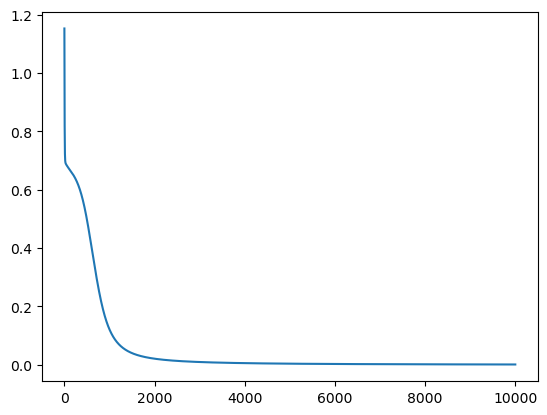

In [54]:
import matplotlib.pylab as plt
plt.plot(losses)

In [55]:
print(a2)
print(y)

tensor([[7.4539e-04],
        [9.9768e-01],
        [9.9907e-01],
        [1.1904e-03]], grad_fn=<MulBackward0>)
tensor([[0.],
        [1.],
        [1.],
        [0.]])
